# Practical 2
## To understand the Multi Layer Perceptron by implementing XOR Logic Gate
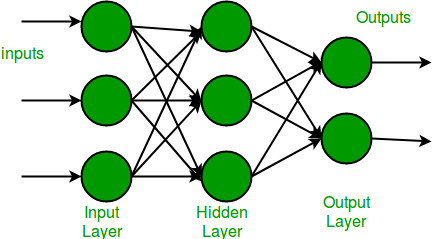
### A **Multilayer Perceptron (MLP)** is a type of **feedforward artificial neural network** consisting of an input layer, one or more hidden layers, and an output layer. It is capable of learning **nonlinear functions** using multiple layers of neurons and the **backpropagation** algorithm.
+ Every connection in the diagram is a representation of the fully connected nature of an MLP. This means that every node in one layer connects to every node in the next layer. As the data moves through the network each layer transforms it until the final output is generated in the output layer.

#### **Components of Multi-Layer Perceptron (MLP)**
#####  **Input Layer**: Each neuron or node in this layer corresponds to an input feature. For instance, if you have three input features the input layer will have three neurons.
#####  **Hidden Layers**: MLP can have any number of hidden layers with each layer containing any number of nodes. These layers process the information received from the input layer.
#####  **Output Layer**: The output layer generates the final prediction or result. If there are multiple outputs, the output layer will have a corresponding number of neurons.
---

#### **1. Structure of an MLP**

An MLP with:

* $L$ layers (excluding the input layer)
* $n_0$ input neurons (features)
* $n_1, n_2, ..., n_L$ neurons in each hidden and output layer

The layers are connected as:

$$
\text{Input layer} \rightarrow \text{Hidden layers} \rightarrow \text{Output layer}
$$

Each layer performs:

1. **Linear transformation** (weighted sum)
2. **Nonlinear activation function**

---

#### **2. Forward Propagation (Mathematical Formulas)**

Let’s denote:

* $\mathbf{x} \in \mathbb{R}^{n_0}$ : Input vector
* $\mathbf{W}^{[l]} \in \mathbb{R}^{n_l \times n_{l-1}}$ : Weight matrix for layer $l$
* $\mathbf{b}^{[l]} \in \mathbb{R}^{n_l}$ : Bias vector for layer $l$
* $\mathbf{z}^{[l]}$ : Linear combination before activation
* $\mathbf{a}^{[l]}$ : Activation output of layer $l$

For **each layer** $l = 1, 2, ..., L$:

1. **Linear transformation**:

$$
\mathbf{z}^{[l]} = \mathbf{W}^{[l]} \mathbf{a}^{[l-1]} + \mathbf{b}^{[l]}
$$

* Where $\mathbf{a}^{[0]} = \mathbf{x}$ (input layer)

2. **Activation function**:

$$
\mathbf{a}^{[l]} = f^{[l]}(\mathbf{z}^{[l]})
$$

Common activation functions:

* Sigmoid: $f(z) = \frac{1}{1 + e^{-z}}$
* Tanh: $f(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$
* ReLU: $f(z) = \max(0, z)$
* Softmax (for multi-class output):

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_j e^{z_j}}
$$

**Forward Pass Final Output:**

$$
\hat{y} = \mathbf{a}^{[L]}
$$

---

#### **3. Loss Function**

The **loss function** depends on the task:

1. **Regression (MSE):**

$$
\mathcal{L} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$

2. **Binary Classification (Binary Cross-Entropy):**

$$
\mathcal{L} = -\frac{1}{m} \sum_{i=1}^{m} \Big[ y^{(i)} \log \hat{y}^{(i)} + \big(1 - y^{(i)}\big)\log\big(1 - \hat{y}^{(i)}\big) \Big]
$$

3. **Multi-Class Classification (Categorical Cross-Entropy):**

$$
\mathcal{L} = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log \hat{y}_k^{(i)}
$$

Where:

* $m$ = number of samples
* $y$ = true label
* $\hat{y}$ = predicted output

---

#### **4. Backpropagation (Weight Update Equations)**

MLP **learns using gradient descent** via **backpropagation**:

1. **Compute output error**:

$$
\delta^{[L]} = \frac{\partial \mathcal{L}}{\partial \mathbf{a}^{[L]}} \odot f'^{[L]}(\mathbf{z}^{[L]})
$$

Where $\odot$ is element-wise multiplication.

2. **Backpropagate error**:

$$
\delta^{[l]} = \left( \mathbf{W}^{[l+1]^T} \delta^{[l+1]} \right) \odot f'^{[l]}(\mathbf{z}^{[l]})
$$

3. **Compute gradients**:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{W}^{[l]}} = \delta^{[l]} \cdot \mathbf{a}^{[l-1]^T}
$$

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{b}^{[l]}} = \delta^{[l]}
$$

4. **Update weights (Gradient Descent)**:

$$
\mathbf{W}^{[l]} := \mathbf{W}^{[l]} - \eta \frac{\partial \mathcal{L}}{\partial \mathbf{W}^{[l]}}
$$

$$
\mathbf{b}^{[l]} := \mathbf{b}^{[l]} - \eta \frac{\partial \mathcal{L}}{\partial \mathbf{b}^{[l]}}
$$

Where $\eta$ is the **learning rate**.

---

#### **5. Summary of MLP Learning**

1. Initialize weights $\mathbf{W}$ and biases $\mathbf{b}$
2. **Forward pass**: Compute $\mathbf{z}^{[l]}$ and $\mathbf{a}^{[l]}$
3. Compute **loss** $\mathcal{L}$
4. **Backward pass**: Compute $\delta^{[l]}$, gradients, and update weights
5. Repeat for multiple **epochs**

---

#### **6. Explanation of Code Flow**

1. **Initialize parameters** using small random weights.
2. **Forward propagation**:

   * Computes $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$
   * Applies activation function $A^{[l]} = f(Z^{[l]})$
3. **Loss computation**: Binary cross-entropy
4. **Backward propagation**:

   * Computes $\delta^{[L]} = \hat{y} - y$
   * Propagates error to previous layers using:

     $$
     \delta^{[l]} = (W^{[l+1]^T} \delta^{[l+1]}) \odot f'(Z^{[l]})
     $$
5. **Parameter update** using gradient descent.

---


## Software Used 
- Python (3.x)
- Jupyter-Lab
## Libraries Used
- JAX
- Matplotlib

### Necessary Imports

In [44]:
import jax
import jax.numpy as jnp
from jax import random
import matplotlib.pyplot as plt

### Iniating necessary variables for training Multi-Layer Perceptron

In [45]:
def init_params(key, l,L):
    params = []
    for i in range(l - 1):
        key, subkey = random.split(key)
        w = random.normal(subkey, (L[i], L[i + 1])) * jnp.sqrt(2.0 / L[i]) #for stable variance
        b = jnp.zeros((L[i + 1],))
        params.append((w, b))
    return params

### Sigmoid Activation Function

In [46]:
def sigmoid(x):
    return 1 / (1 + jnp.exp(-x))

### Derivative of Sigmoid Activation Function

In [47]:
def derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

###  Forward Propagation
#### In forward propagation the data flows from the input layer to the output layer, passing through any hidden layers. Each neuron in the hidden layers processes the input.

In [48]:
def forward(params, X):
    a = [X]       # list of activations (a[0] = input)
    Z = []        # list of pre-activations (z before activation)
    for i, (w, b) in enumerate(params):
        z = jnp.dot(jnp.array(a[-1]),jnp.array(w)) + jnp.array(b)   # pre-activation
        Z.append(z)
        activate = sigmoid(z) # activation
        a.append(activate)
    return a[-1], Z, a

### Loss Function
#### Once the network generates an output the next step is to calculate the loss using a loss function. In supervised learning this compares the predicted output to the actual label.

In [49]:
def loss_binary(y_hat, Y): # Binary Cross Entropy Loss Function
    return -jnp.mean(Y * jnp.log(y_hat + 1e-8) + (1 - Y) * jnp.log(1 - y_hat + 1e-8))

def mse_loss(y_hat, Y): # Mean Square Error Loss Function
    return jnp.mean(jnp.square(y_hat-Y))

### Back Propagation
#### The goal of training an MLP is to minimize the loss function by adjusting the network's weights and biases. This is achieved through backpropagation:
+ **Gradient Calculation**: The gradients of the loss function with respect to each weight and bias are calculated using the chain rule of calculus.
+ **Error Propagation**: The error is propagated back through the network, layer by layer.
+ **Gradient Descent**: The network updates the weights and biases by moving in the opposite direction of the gradient to reduce the loss.

In [50]:
def backward(params, X, Y, Z, a):
    grads = []
    Delta=[]
    
    delta = 2*(jnp.array(a[-1]) - Y)/Y.shape[1] # output layer error calculated analytically uses MSE LOSS
    Delta.append(delta)
    
    for i in reversed(range(len(params))):
        w, b = params[i]
        
        grad_w = jnp.dot(a[i].T, delta) # gradient w.r.t. weights
        grad_b = jnp.mean(delta, axis=0)  # gradient w.r.t. biases
        grads.append((grad_w, grad_b))
        
        if i > 0:  # not the first layer
            delta = jnp.dot(delta, w.T) * derivative(Z[i - 1])  # backpropagate error
            Delta.append(delta)
    return list(reversed(grads))

### Training MLP Model

In [51]:
def MLP_Training(X, Y, L, l, epochs, learning_rate, key):
    params = init_params(key, l,L)
    history = []
    for epoch in range(epochs):
        y_hat, Z, a = forward(params, X)
        grads = backward(params, X, Y, Z, a)
        
        # Update parameters
        params = [(w - learning_rate * grad_w, b - learning_rate * grad_b) 
                  for (w, b), (grad_w, grad_b) in zip(params, grads)]
        
        # Track every 1000 epochs
        if epoch % 1000 == 0:
            los_mse = mse_loss(y_hat, Y) #mean squared error loss
            los_bin = loss_binary(y_hat, Y) #binary cross entropy loss
            # --- Compute accuracy (for binary classification) ---
            preds = (y_hat >= 0.5).astype(int)   # threshold at 0.5
            acc = (preds == Y).mean()
            print(f'Epoch {epoch}, bin_Loss: {los_bin}, MSE_Loss: {los_mse} , Accuracy: {acc}')
            history.append({
                "epoch": epoch,
                "accuracy": float(acc), 
                "mse_loss": float(los_mse),
                "binary_loss": float(los_bin),
                "weights": [w.copy() for (w, _) in params],
                "biases": [b.copy() for (_, b) in params]
            })
    return params, history


### Generate graph for plotting Loss and Accuracy evolution over Epochs

In [52]:
def plot_loss_accuracy(history):
    if not history:
        print("No training history to plot.")
        return
    
    # Support both list of dicts and simple list of floats
    if isinstance(history[0], dict):
        # Extract losses and epochs if present
        binary_losses = jnp.array([float(h.get('binary_loss', jnp.nan)) for h in history])
        mse_losses = jnp.array([float(h.get('mse_loss', jnp.nan)) for h in history])
        epochs = jnp.array([h.get('epoch', i) for i, h in enumerate(history)])
        accuracies   = jnp.array([float(h.get('accuracy', jnp.nan)) for h in history])
    else:
        losses = jnp.array(history)
        epochs = jnp.arange(len(losses))
        binary_losses = losses
        mse_losses = jnp.full_like(losses, jnp.nan)   # No MSE in simple case
        accuracies = jnp.full_like(losses, jnp.nan)   # No accuracy in simple case
        
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, binary_losses, marker='o', label="Binary Loss")
    plt.plot(epochs, mse_losses, marker='x', label="MSE Loss")
    plt.plot(epochs, accuracies, marker='s', label="Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss Over Epochs")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Generate graph for plotting Decision Boundary

In [53]:
def plot_decision_boundary(X, Y, weights, biases, resolution=200):
    # Compute bounds 
    x_min, x_max = jnp.min(X[:, 0]) - 0.5, jnp.max(X[:, 0]) + 0.5
    y_min, y_max = jnp.min(X[:, 1]) - 0.5, jnp.max(X[:, 1]) + 0.5

    # Create grid Linespace + Meshgrid 
    xx, yy = jnp.meshgrid(
        jnp.linspace(x_min, x_max, resolution),
        jnp.linspace(y_min, y_max, resolution)
    )
    grid_points = jnp.c_[xx.ravel(), yy.ravel()]

    # Forward pass (MLP)
    def forward_pass(X_in, weights, biases):
        A = X_in
        for w, b in zip(weights, biases):
            Z = jnp.dot(A, w) + b
            A = 1 / (1 + jnp.exp(-Z))  # sigmoid
        return A

    # Predictions on grid
    preds = forward_pass(grid_points, weights, biases)
    preds = preds.reshape(xx.shape)

    # --- Accuracy on training set ---
    y_hat_train = forward_pass(X, weights, biases)
    preds_train = (y_hat_train >= 0.5).astype(int)
    acc = (preds_train == Y).mean()

    # Convert to array for plotting
    xx_np, yy_np, preds_np = map(lambda arr: jnp.array(arr), (xx, yy, preds))
    X_np, Y_np = jnp.array(X), jnp.array(Y)

    # Plot decision boundary
    plt.contourf(xx_np, yy_np, preds_np, levels=[0, 0.5, 1], alpha=0.3, cmap='coolwarm')
    plt.contour(xx_np, yy_np, preds_np, levels=[0.5], colors='k', linewidths=2)
    plt.scatter(X_np[:, 0], X_np[:, 1], c=Y_np, cmap='coolwarm', edgecolors='k')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"Decision Boundary (Accuracy = {acc:.2f})")  # Accuracy shown in title
    plt.grid(True)
    plt.show()

### Generate graph for plotting Weight and Bias evolution over Epochs

In [54]:
def plot_params_evolution(history):
    if not history:
        print("No training history to plot parameters.")
        return

    epochs = [h["epoch"] for h in history]
    # history[0]["weights"] and history[0]["biases"] exist and are lists of arrays
    num_weight_layers = len(history[0]["weights"])
    num_bias_layers = len(history[0]["biases"])

    # Plot Weights
    for i in range(num_weight_layers):
        plt.figure(figsize=(10, 6))
        # Transpose weights for easier plotting of individual weights
        layer_weights = jnp.stack([h["weights"][i].flatten() for h in history])
        for j in range(layer_weights.shape[1]):
            plt.plot(epochs, layer_weights[:, j], label=f'Weight {j+1}')
        plt.xlabel("Epochs")
        plt.ylabel("Weight Value")
        plt.title(f"Evolution of Weights in Layer {i+1}")
        plt.legend()
        plt.grid(True)
        plt.show()

    # Plot Biases
    for i in range(num_bias_layers):
        plt.figure(figsize=(10, 6))
        layer_biases = jnp.stack([h["biases"][i].flatten() for h in history])
        for j in range(layer_biases.shape[1]):
             plt.plot(epochs, layer_biases[:, j], label=f'Bias {j+1}')
        plt.xlabel("Epochs")
        plt.ylabel("Bias Value")
        plt.title(f"Evolution of Biases in Layer {i+1}")
        plt.legend()
        plt.grid(True)
        plt.show()

### Making Prediction

In [55]:
def predict(X, parms):
    activations, Z, a = forward(parms,X)
    return (activations[-1] >= 0.5 ).astype(float)

### Finding Accuracy

In [56]:
def accuracy(parms, X, Y):
    predictions = predict(X,parms)
    return jnp.mean(predictions == Y)

### Training XOR Gate  for Layers L = [2,2,1]

Epoch 0, bin_Loss: 0.7405064105987549, MSE_Loss: 0.2716177999973297 , Accuracy: 0.5
Epoch 1000, bin_Loss: 0.6501744985580444, MSE_Loss: 0.22906330227851868 , Accuracy: 0.5
Epoch 2000, bin_Loss: 0.5703393220901489, MSE_Loss: 0.19364145398139954 , Accuracy: 0.75
Epoch 3000, bin_Loss: 0.5019791722297668, MSE_Loss: 0.16653168201446533 , Accuracy: 0.75
Epoch 4000, bin_Loss: 0.4437786638736725, MSE_Loss: 0.14594551920890808 , Accuracy: 0.75
Epoch 5000, bin_Loss: 0.4080146849155426, MSE_Loss: 0.1347305178642273 , Accuracy: 0.75
Epoch 6000, bin_Loss: 0.379801869392395, MSE_Loss: 0.12388522922992706 , Accuracy: 0.75
Epoch 7000, bin_Loss: 0.2841486930847168, MSE_Loss: 0.07749578356742859 , Accuracy: 1.0
Epoch 8000, bin_Loss: 0.18626263737678528, MSE_Loss: 0.03811270743608475 , Accuracy: 1.0
Epoch 9000, bin_Loss: 0.12155237048864365, MSE_Loss: 0.017733532935380936 , Accuracy: 1.0
History length: 10
First checkpoint: {'epoch': 0, 'accuracy': 0.5, 'mse_loss': 0.2716177999973297, 'binary_loss': 0.74

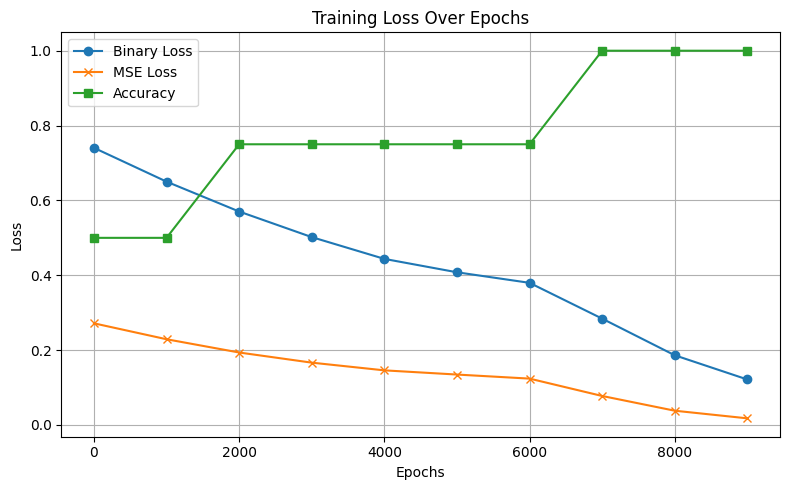

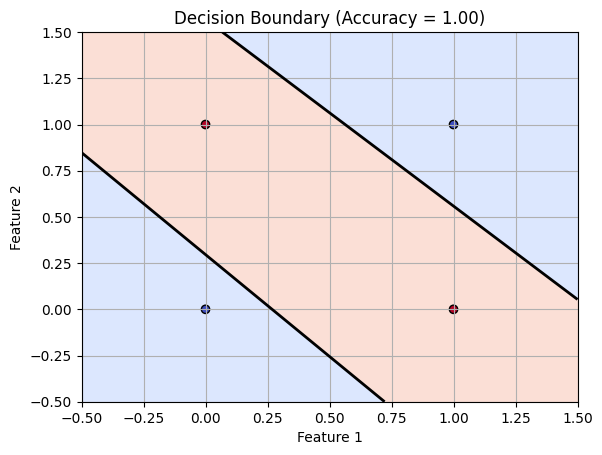

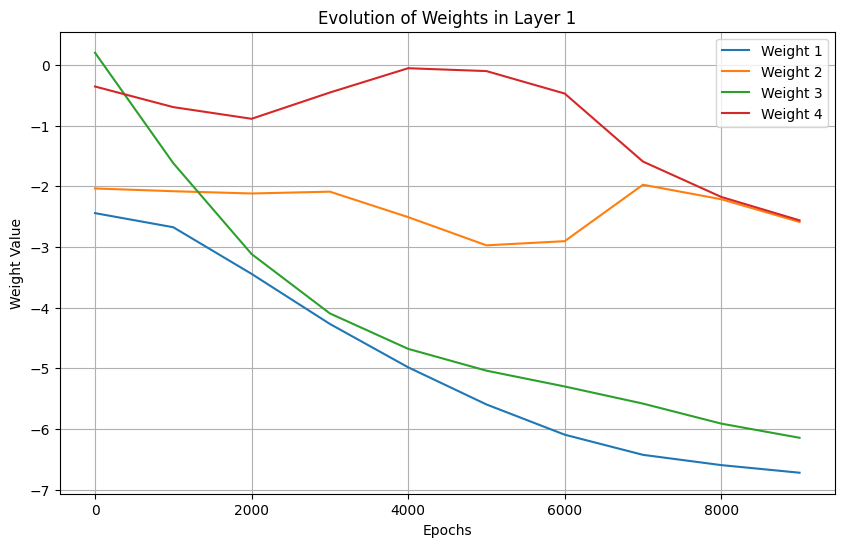

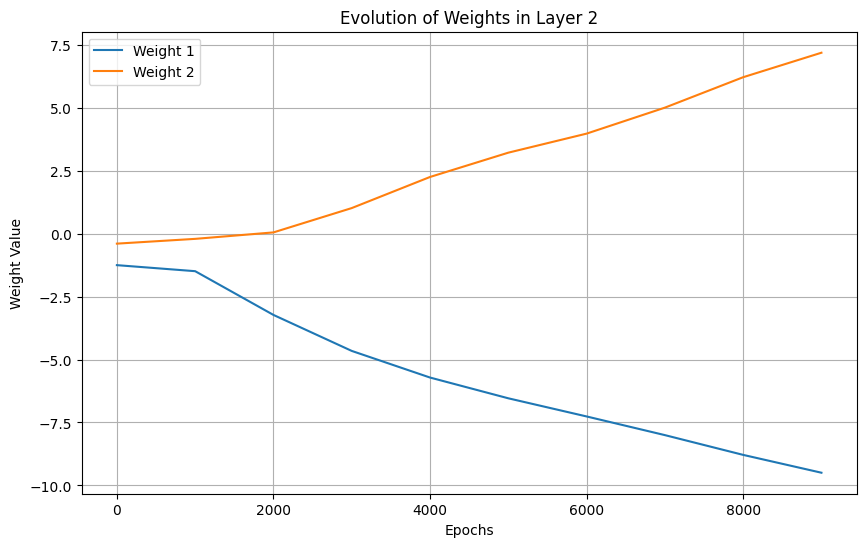

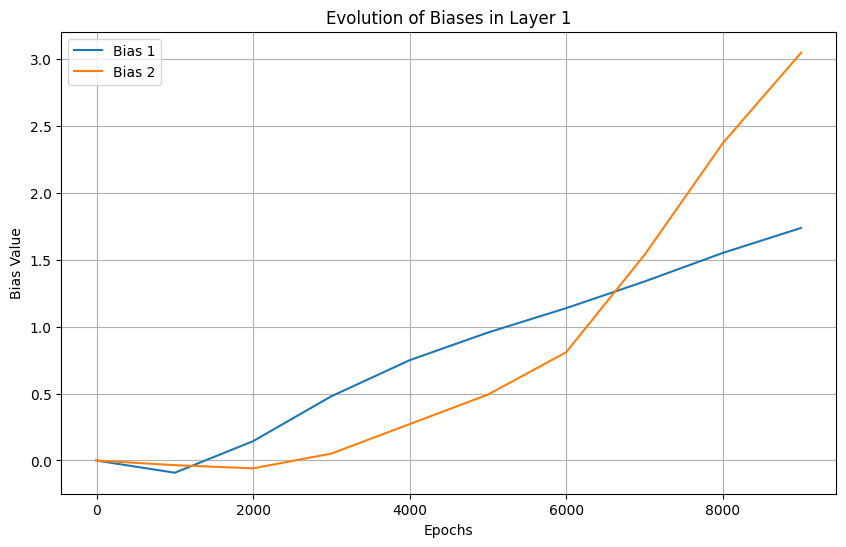

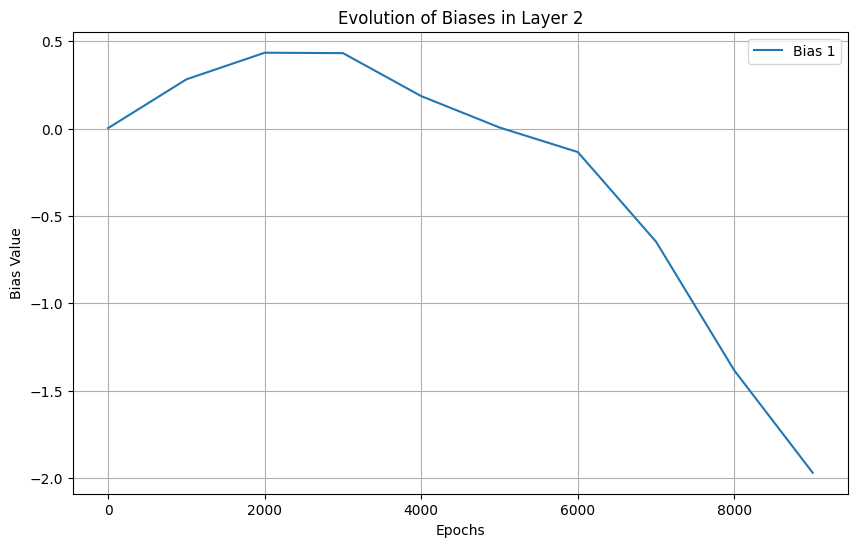

In [57]:
X= jnp.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = jnp.array([0,1,1,0])
epoches = 10000
learning_rate = 0.01
L=[2,2,1]
l=len(L)
key= random.PRNGKey(0)
Y = Y.reshape(-1, 1)  # Reshape Y to a column vector

params, history = MLP_Training(X=X, Y=Y, L=L, l=l, epochs=epoches, learning_rate=learning_rate, key=key)

print("History length:", len(history))
print("First checkpoint:", history[0])
print("Last checkpoint:", history[-1])

final_weights = history[-1]["weights"]
final_biases  = history[-1]["biases"]

print("Final Weights:", final_weights)
print("Final Biases:", final_biases)
print("Accuracy of the model:", accuracy(params, X, Y))
plot_loss_accuracy(history)
plot_decision_boundary(X, Y, final_weights, final_biases)
plot_params_evolution(history)

### Training MLP Model for Layer L=[2,4,4,1] keeping other parameters same

Epoch 0, bin_Loss: 0.7956138849258423, MSE_Loss: 0.2962838411331177 , Accuracy: 0.5
Epoch 1000, bin_Loss: 0.6940008401870728, MSE_Loss: 0.2504268288612366 , Accuracy: 0.5
Epoch 2000, bin_Loss: 0.6885759234428406, MSE_Loss: 0.24771562218666077 , Accuracy: 0.5
Epoch 3000, bin_Loss: 0.672865629196167, MSE_Loss: 0.23990878462791443 , Accuracy: 0.75
Epoch 4000, bin_Loss: 0.6187740564346313, MSE_Loss: 0.21408611536026 , Accuracy: 0.75
Epoch 5000, bin_Loss: 0.516808271408081, MSE_Loss: 0.1712835133075714 , Accuracy: 0.75
Epoch 6000, bin_Loss: 0.3449130058288574, MSE_Loss: 0.0964038074016571 , Accuracy: 1.0
Epoch 7000, bin_Loss: 0.09835201501846313, MSE_Loss: 0.009828594513237476 , Accuracy: 1.0
Epoch 8000, bin_Loss: 0.03625012934207916, MSE_Loss: 0.0014072866179049015 , Accuracy: 1.0
Epoch 9000, bin_Loss: 0.01958008110523224, MSE_Loss: 0.0004156751383561641 , Accuracy: 1.0
History length: 10
First checkpoint: {'epoch': 0, 'accuracy': 0.5, 'mse_loss': 0.2962838411331177, 'binary_loss': 0.79561

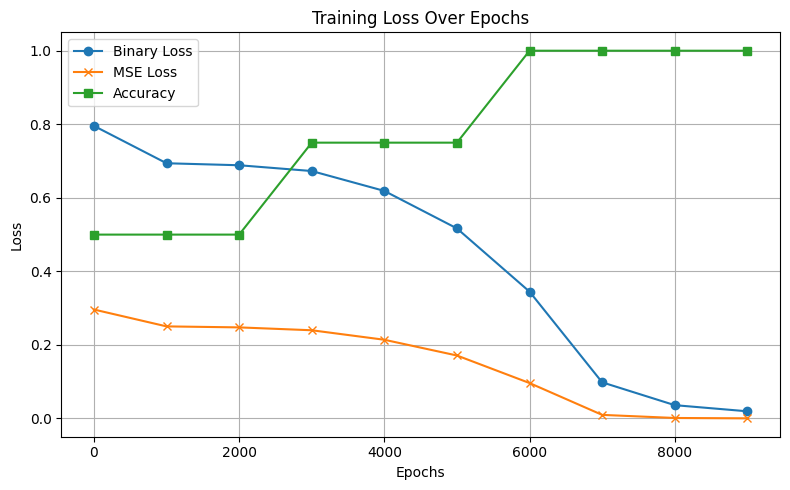

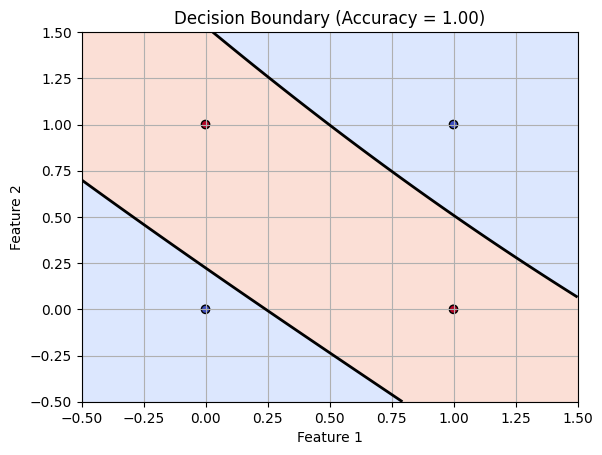

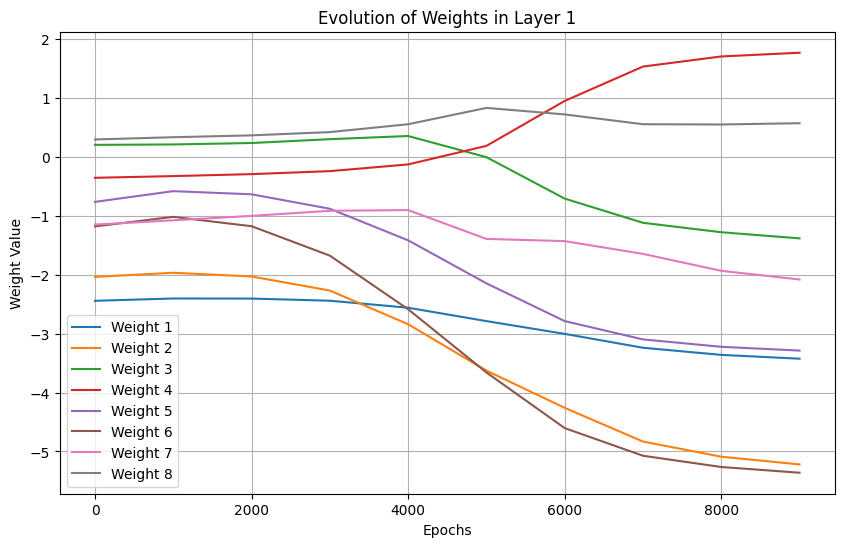

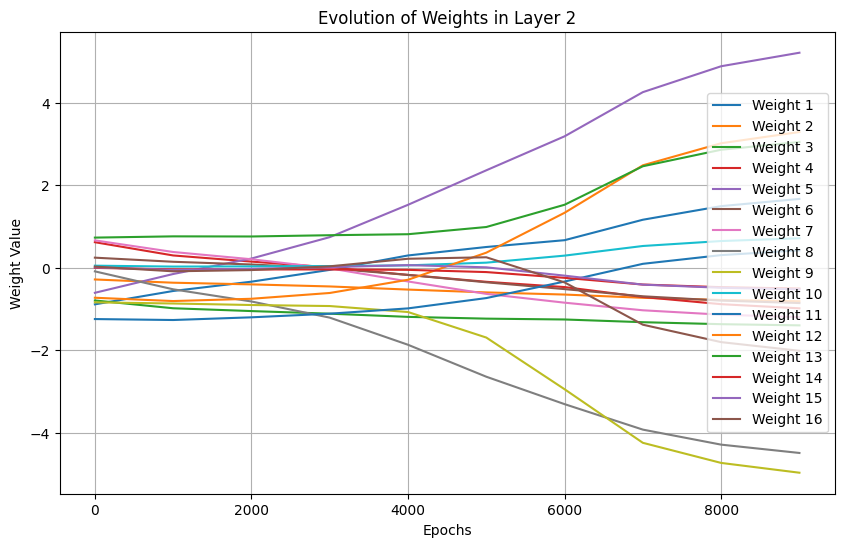

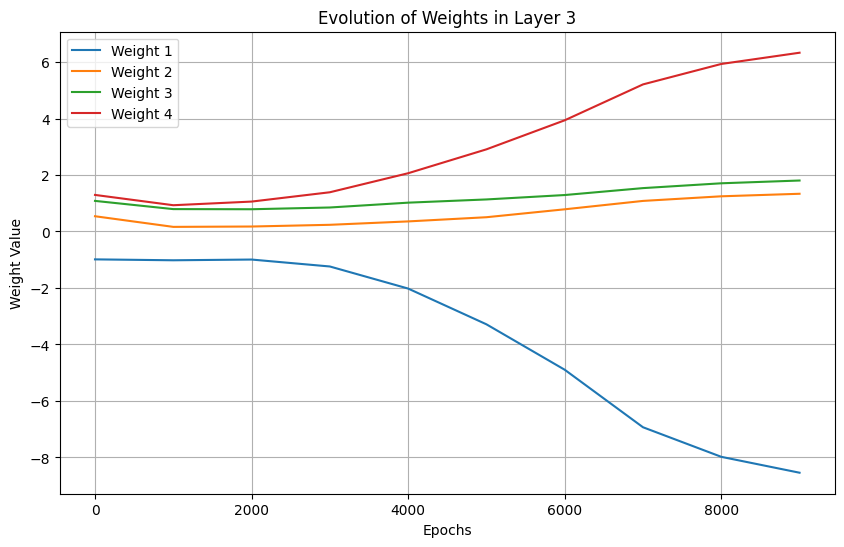

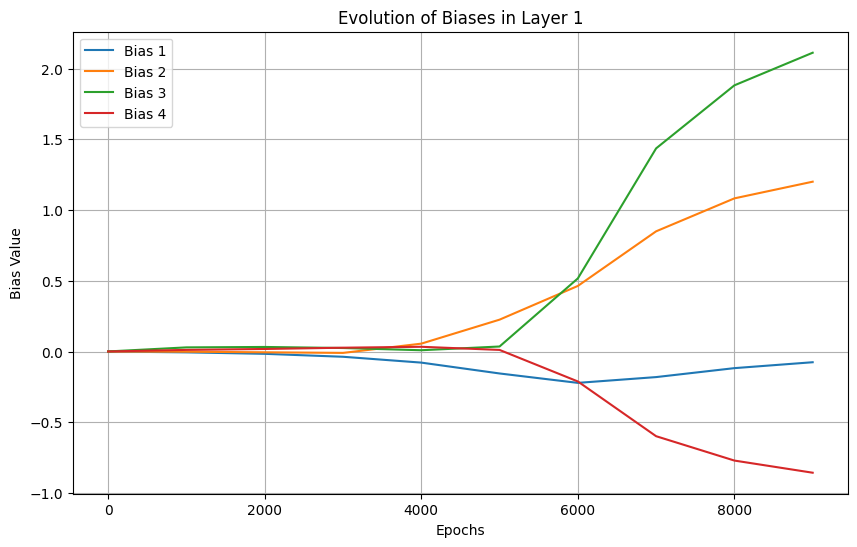

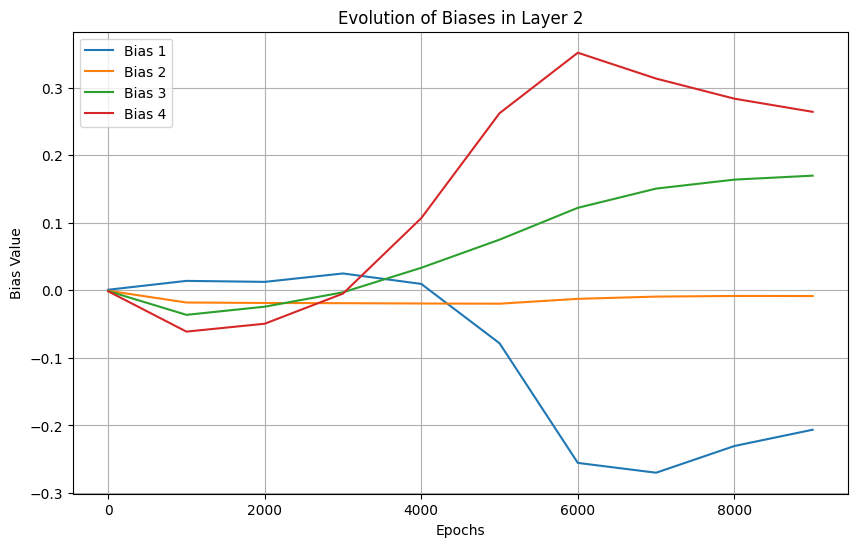

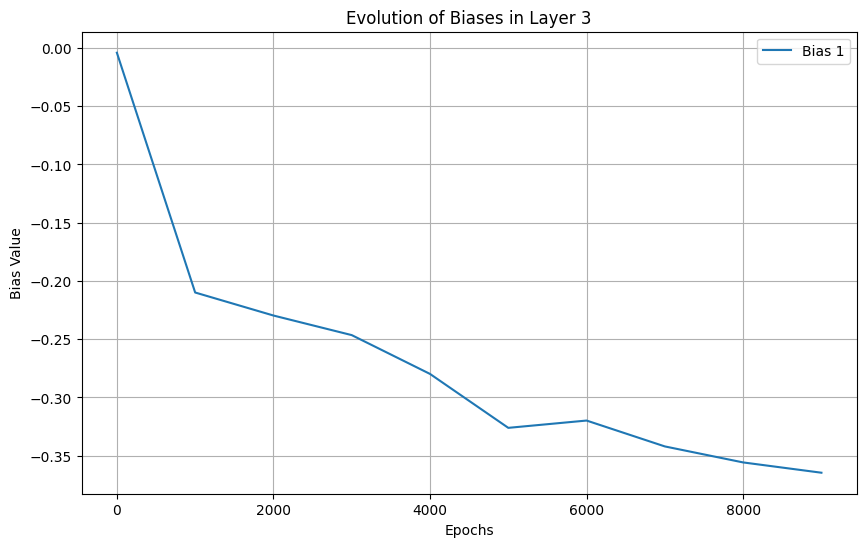

In [58]:
L=[2,4,4,1]

params, history = MLP_Training(X=X, Y=Y, L=L, l=len(L), epochs=epoches, learning_rate=learning_rate, key=key)

print("History length:", len(history))
print("First checkpoint:", history[0])
print("Last checkpoint:", history[-1])

final_weights = history[-1]["weights"]
final_biases  = history[-1]["biases"]

print("Final Weights:", final_weights)
print("Final Biases:", final_biases)
print("Accuracy of the model:", accuracy(params, X, Y))
plot_loss_accuracy(history)
plot_decision_boundary(X, Y, final_weights, final_biases)
plot_params_evolution(history)

> key = jax.random.PRNGKey(0)

* This key is a 2-element uint32 array used to generate random numbers
* The seed initializes the pseudo-random number generator (PRNG) hear seed = 0
* You can change the seed to get different random numbers
* Because JAX requires functional, stateless random numbers (stateless mean all randomness comes from an explicit key you pass to functions.) 
* To make randomness reproducible and JIT-compatible
* If you use the same key, you will get the same random numbers (deterministic)
+ A `key = jax.random.PRNGKey(seed)`  is not reusable
* It must be split using `key, subkey = jax.random.split(key)`before each use. Otherwise, using the same key twice gives non-random (repeated) or error-prone behavior
> random_value = jax.random.normal(subkey,()) or random_value = jax.random.normal(subkey,(cf,))
* The second argument to jax.random.normal(key, shape) must be a tuple specifying the array shape.

  - (cf,) → a 1D array with length cf
  * (cf, 1) → a 2D column vector
  * (cf, cf) → a 2D matrix
  * (cf, hidden_dim) → 2D array for a dense layer

* Even if it’s just 1D, JAX requires a tuple to define the shape because it’s consistent with N-dimensional arrays.
* If you’re passing an integer instead of a tuple, so JAX doesn’t know if you want 1D or scalar.

